# TPP10 P5

first importing the participant 5 dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from pandas.api.types import CategoricalDtype
import seaborn as sns

# import csv with pandas
dataset_path = Path('../../../datasets')
raw_data_p5 = pd.read_csv(dataset_path / 'Participant-05-detail.csv')
p5 = raw_data_p5.copy()
p5

,Source,Date,Hour,Count
0,person5,2022-01-27,8,4
1,person5,2022-01-02,13,78
2,person5,2022-01-02,12,66
3,person5,2022-01-02,12,57
4,person5,2022-01-02,12,99
...,...,...,...,...
12132,person5,2022-09-01,19,59
12133,person5,2022-09-01,19,102
12134,person5,2022-09-01,19,15
12135,person5,2022-09-01,21,35


In [2]:
dataset_path = Path('../../../datasets/additional')
raw_data = pd.read_csv(dataset_path / 'rainfall_syd.csv',parse_dates= {"Date" : ["Year","Month","Day"]})
sydrain = raw_data.copy()

dataset_path = Path('../../../datasets/additional')
raw_data2 = pd.read_csv(dataset_path / 'solar_cent_park.csv',parse_dates= {"Date" : ["Year","Month","Day"]})
sun = raw_data2.copy()

data cleaning

In [5]:
# date column is converted to datetime format and weekday name and month is extracted from date
p5['Date'] = pd.to_datetime(p5['Date'])
p5['Week Day'] = p5['Date'].dt.day_name()
p5['Month'] = p5['Date'].dt.month_name()
sydrain['Month'] = sydrain['Date'].dt.month_name()
sydrain['Week Day'] = sydrain['Date'].dt.day_name()
sun['Month'] = sun['Date'].dt.month_name()
sun['Week Day'] = sun['Date'].dt.day_name()

# column count is renamed to show what it counts
p5 = p5.rename(columns={'Count': 'Steps (count)'})

# week days are ordered so that it's matches the order that day of the week are.
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)
p5['Week Day'] = p5['Week Day'].astype(cat_type)
sydrain['Week Day'] = sydrain['Week Day'].astype(cat_type)
sun['Week Day'] = sun['Week Day'].astype(cat_type)

#Using drop() to delete rows based on column value 
# I want to drop the months of december and september as they have less than 1 week of recorded data therefore is not required
p5.drop(p5[p5['Month'] == 'December'].index, inplace = True)
p5.drop(p5[p5['Month'] == 'September'].index, inplace = True)

## Data Exploration

In [6]:
day2 = p5.groupby(['Date'], as_index=False).agg({'Steps (count)': 'sum','Week Day': 'first','Month': 'first'})
day2

,Date,Steps (count),Week Day,Month
0,2022-01-01,114,Saturday,January
1,2022-01-02,8681,Sunday,January
2,2022-01-03,5104,Monday,January
3,2022-01-04,8031,Tuesday,January
4,2022-01-05,7743,Wednesday,January
...,...,...,...,...
216,2022-08-27,12485,Saturday,August
217,2022-08-28,12888,Sunday,August
218,2022-08-29,6036,Monday,August
219,2022-08-30,9820,Tuesday,August


Text(0.5, 1.0, 'Average daily steps by weekday')

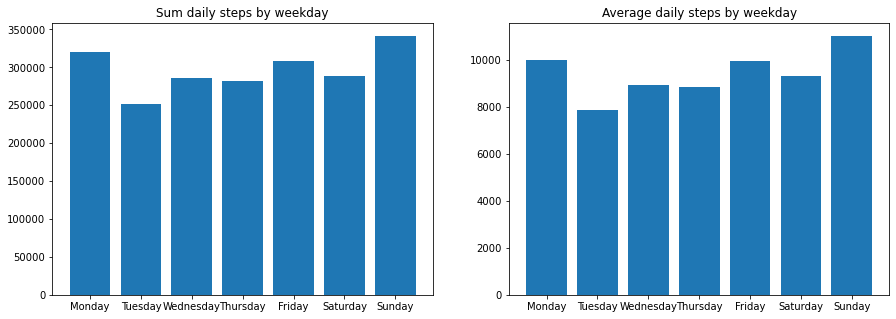

In [7]:
# first group the data by weekday, week_count variable for the total sum of steps for those week days
# week_avg variable for the average step count for those week days
p5_count = day2.groupby(['Week Day'])['Steps (count)'].sum()
p5_avg = day2.groupby(['Week Day'])['Steps (count)'].mean()
# set size of the plot
plt.rcParams["figure.figsize"] = (15,5)

# make side by side subplots
fig, axs = plt.subplots(1, 2)
# bar plot for total steps
axs[0].bar(cats, p5_count)
axs[0].set_title('Sum daily steps by weekday')
# bar plot for average steps
axs[1].bar(cats, p5_avg)
axs[1].set_title('Average daily steps by weekday')

## Subquestion

Does the week day step patterns differ month to month?

In [8]:
# order the months by the time they were recorded
cat2 = ['December','January','February','March','April','May','June','July','August','September']
cat2_type = CategoricalDtype(categories=cat2, ordered=True)
day2['Month'] = day2['Month'].astype(cat2_type)
# group by month
week_month_count = day2.groupby(['Month','Week Day']).agg({'Steps (count)': 'mean','Date':'first'}).reset_index()
week_month_count

,Month,Week Day,Steps (count),Date
0,December,Monday,NaN,NaT
1,December,Tuesday,NaN,NaT
2,December,Wednesday,NaN,NaT
3,December,Thursday,NaN,NaT
4,December,Friday,NaN,NaT
...,...,...,...,...
65,September,Wednesday,NaN,NaT
66,September,Thursday,NaN,NaT
67,September,Friday,NaN,NaT
68,September,Saturday,NaN,NaT


C:\Users\autum\AppData\Local\Temp/ipykernel_14268/1174116253.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


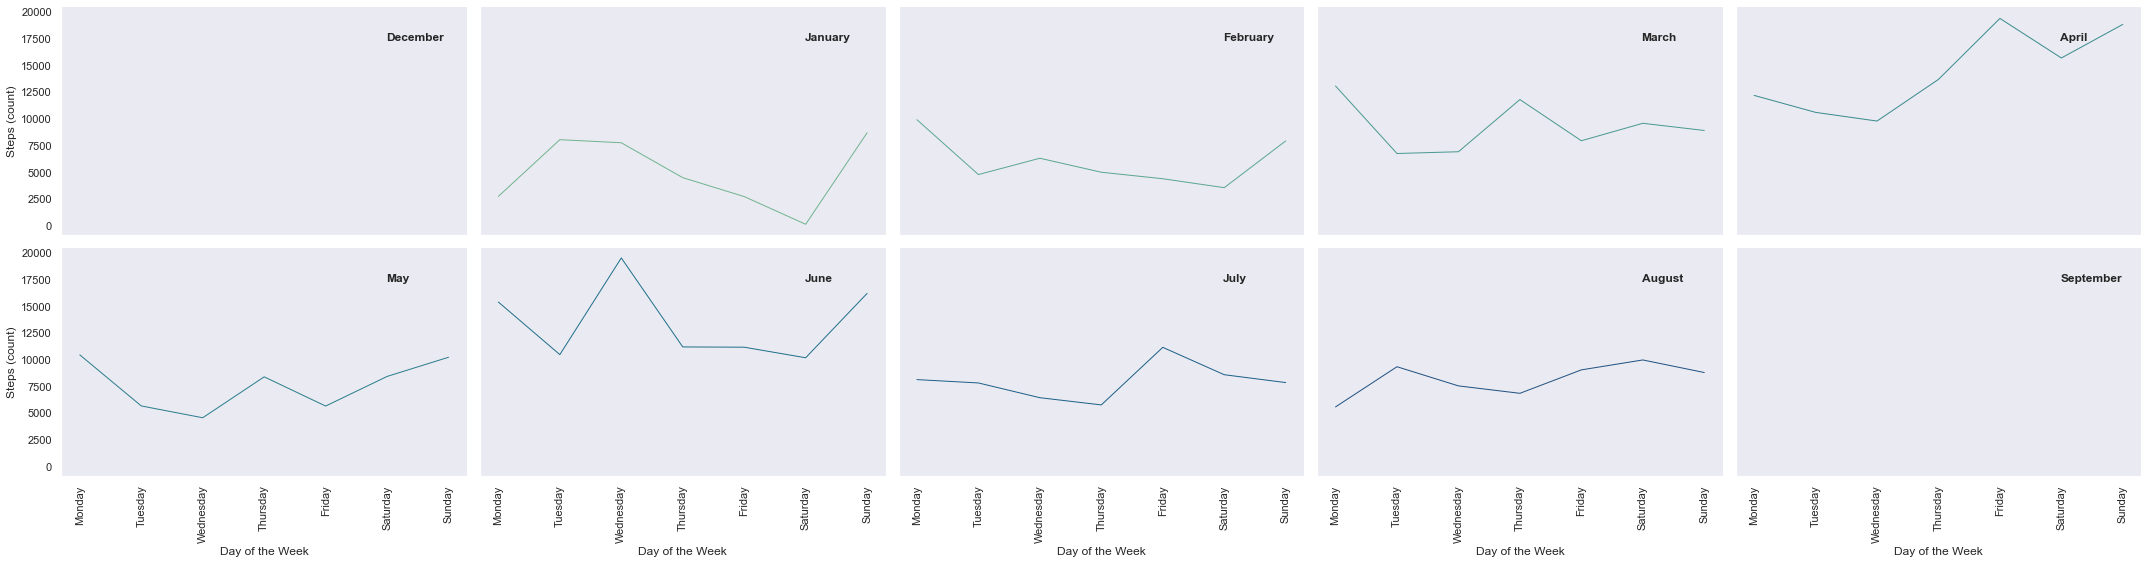

In [9]:

import seaborn as sns

sns.set_theme(style="dark")

# Plot each months's step count for day of the week.
g = sns.relplot(
    data=week_month_count,
    x="Week Day", y="Steps (count)", col="Month", hue="Month",
    kind="line", palette="crest", linewidth=1, zorder=5,
    col_wrap=5, height=4, aspect=1.5, legend=False
)

# Iterate over each subplot to customize further
for Month, ax in g.axes_dict.items():
    # Rotate the xticks by 90 degrees  
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
    # Add the title for the months as an annotation within the plot
    ax.text(.8, .85, Month, transform=ax.transAxes, fontweight="bold")
    

# Reduce the frequency of the x axis ticks
# ax.set_xticks(ax.get_xticks()[::2])

# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("Day of the Week", "Steps (count)")
g.tight_layout()


Text(0.5, 1.0, 'Monthly Average Step Count for Days of the Week')

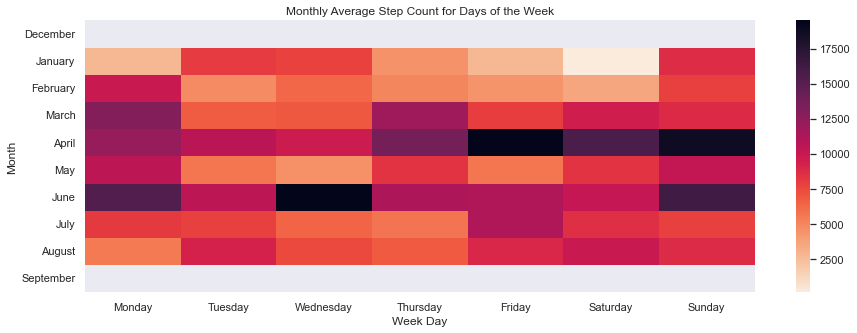

In [10]:
# first group the required data
week_month_count2 = day2.groupby(['Month','Week Day']).agg({'Steps (count)': 'mean'}).reset_index()
# create pivot table from the above dataframe, so the format matches what is required for seaborn heatmap
week_month_count2 = week_month_count2.pivot("Month", "Week Day", "Steps (count)")
# now plot the data using seaborn
ax = sns.heatmap(week_month_count2,cmap='rocket_r')
ax.set_title('Monthly Average Step Count for Days of the Week')

## Sub Question 2

Does weather conditions such as rainfall and amount of sun impact the number of steps made in a week.

<BarContainer object of 7 artists>

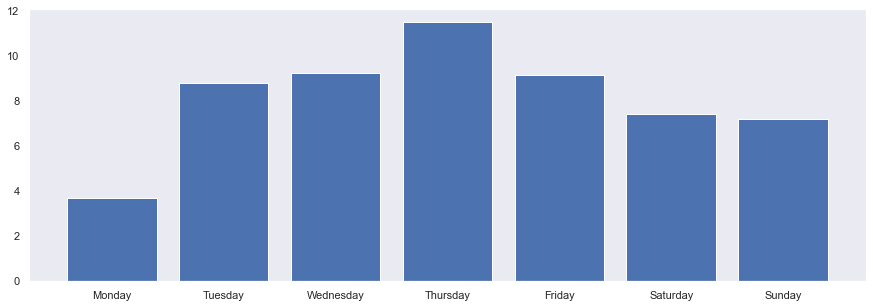

In [11]:
rain_count = sydrain.groupby(['Week Day'])['Rainfall amount (millimetres)'].mean().reset_index()
rain_count
plt.bar(rain_count['Week Day'],rain_count['Rainfall amount (millimetres)'])

Text(0.5, 1.0, 'Monthly Average Rainfall for Days of the Week')

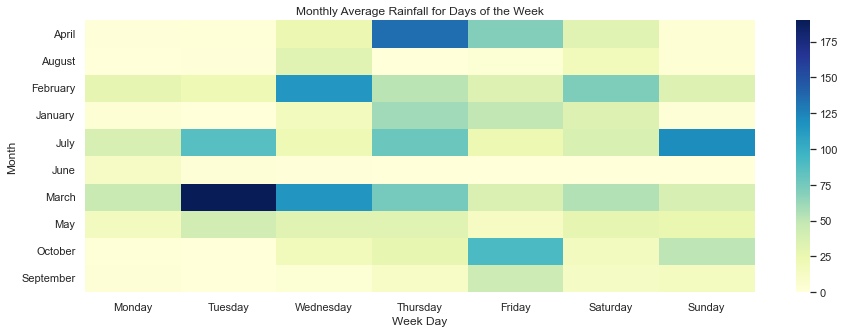

In [12]:
# first group the required data
week_month_count3 = sydrain.groupby(['Month','Week Day']).agg({'Rainfall amount (millimetres)': 'sum'}).reset_index()
# create pivot table from the above dataframe, so the format matches what is required for seaborn heatmap
week_month_count3 = week_month_count3.pivot("Month", "Week Day", "Rainfall amount (millimetres)")
# now plot the data using seaborn
ax = sns.heatmap(week_month_count3,cmap='YlGnBu')
ax.set_title('Monthly Average Rainfall for Days of the Week')

In [13]:
t = day2.copy()

t = pd.merge(t,sydrain[['Rainfall amount (millimetres)','Date']],on='Date', how='left')
t

,Date,Steps (count),Week Day,Month,Rainfall amount (millimetres)
0,2022-01-01,114,Saturday,January,0.0
1,2022-01-02,8681,Sunday,January,0.0
2,2022-01-03,5104,Monday,January,0.0
3,2022-01-04,8031,Tuesday,January,0.0
4,2022-01-05,7743,Wednesday,January,3.8
...,...,...,...,...,...
216,2022-08-27,12485,Saturday,August,12.4
217,2022-08-28,12888,Sunday,August,3.6
218,2022-08-29,6036,Monday,August,0.0
219,2022-08-30,9820,Tuesday,August,0.4


<BarContainer object of 7 artists>

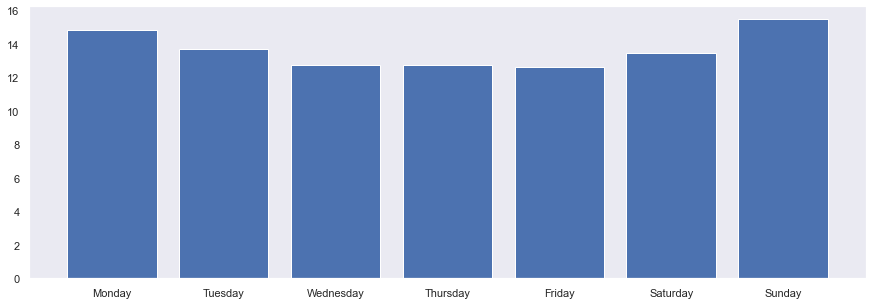

In [14]:
sun_count = sun.groupby(['Week Day'])['Daily global solar exposure (MJ/m*m)'].mean().reset_index()
# sun_count
plt.bar(sun_count['Week Day'],sun_count['Daily global solar exposure (MJ/m*m)'])

Text(0.5, 1.0, 'Monthly Average Sunlight for Days of the Week')

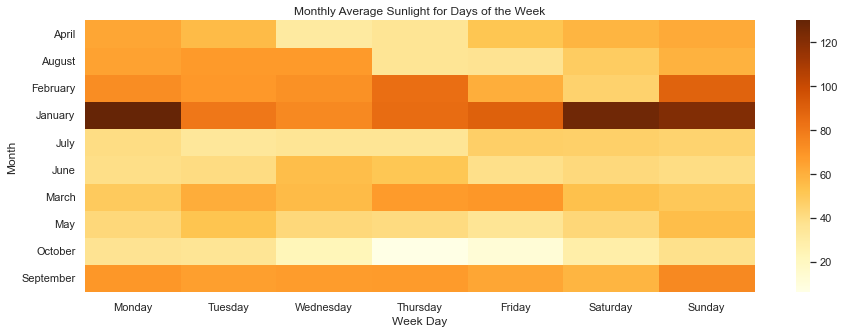

In [15]:
# first group the required data
week_month_count4 = sun.groupby(['Month','Week Day']).agg({'Daily global solar exposure (MJ/m*m)': 'sum'}).reset_index()
# create pivot table from the above dataframe, so the format matches what is required for seaborn heatmap
week_month_count4 = week_month_count4.pivot("Month", "Week Day", "Daily global solar exposure (MJ/m*m)")
# now plot the data using seaborn
ax = sns.heatmap(week_month_count4, cmap='YlOrBr')
ax.set_title('Monthly Average Sunlight for Days of the Week')

In [16]:
t2 = pd.merge(t,sun[['Daily global solar exposure (MJ/m*m)','Date']],on='Date', how='left')
t2

,Date,Steps (count),Week Day,Month,Rainfall amount (millimetres),Daily global solar exposure (MJ/m*m)
0,2022-01-01,114,Saturday,January,0.0,27.6
1,2022-01-02,8681,Sunday,January,0.0,31.9
2,2022-01-03,5104,Monday,January,0.0,31.6
3,2022-01-04,8031,Tuesday,January,0.0,28.6
4,2022-01-05,7743,Wednesday,January,3.8,16.8
...,...,...,...,...,...,...
216,2022-08-27,12485,Saturday,August,12.4,10.6
217,2022-08-28,12888,Sunday,August,3.6,16.4
218,2022-08-29,6036,Monday,August,0.0,11.9
219,2022-08-30,9820,Tuesday,August,0.4,16.0


In [17]:
t2.corr()

,Steps (count),Rainfall amount (millimetres),Daily global solar exposure (MJ/m*m)
Steps (count),1.000000,-0.068706,-0.131185
Rainfall amount (millimetres),-0.068706,1.000000,-0.293867
Daily global solar exposure (MJ/m*m),-0.131185,-0.293867,1.000000
